# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

# Installation

* `pip install openml`

In [1]:
#!pip install openml # already installed

### Exercise
- Find datasets with more than 10000 examples
- Find a dataset called 'eeg_eye_state'
- Find all datasets with more than 50 classes

##### Imports

In [2]:
from openml import datasets, tasks, runs, flows, config, evaluations, study
import os, pandas as pd, numpy as np, seaborn as sns, sklearn

##### Config apikey and cache

In [3]:
config.apikey = '5f0b74b33503e4ad4a7181a91e28719f'
config.server = 'https://test.openml.org/api/v1'
config.set_cache_directory(os.path.expanduser('C:/Users/Ponnivalavan Kumar/.openml/cache'))

##### Download list of datasets

In [4]:
openml_list = datasets.list_datasets()

In [5]:
data_list = pd.DataFrame.from_dict(openml_list, orient='index')
data_list.head(5)

,did,name,format,status,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
1,1,anneal,ARFF,active,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
2,2,kr-vs-kp,ARFF,active,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
3,3,letter,ARFF,active,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
4,4,balance-scale,ARFF,active,288.0,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0
5,5,mfeat-factors,ARFF,active,200.0,10.0,200.0,10.0,217.0,2000.0,0.0,0.0,216.0,1.0


In [6]:
data_list[data_list['NumberOfInstances'] > 10000].sort_values(['NumberOfInstances']).head(4)

,did,name,format,status,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
61,61,artificial-characters,ARFF,active,1416.0,10.0,600.0,10.0,8.0,10218.0,0.0,0.0,7.0,1.0
71,71,har,ARFF,active,1944.0,6.0,1406.0,6.0,562.0,10299.0,0.0,0.0,561.0,1.0
51,51,jm1,ARFF,active,8779.0,2.0,2106.0,2.0,22.0,10885.0,5.0,25.0,21.0,1.0
18,18,pendigits,ARFF,active,1144.0,10.0,1055.0,10.0,17.0,10992.0,0.0,0.0,16.0,1.0


In [7]:
data_list[data_list.name =='eeg-eye-state']

,did,name,format,status,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
68,68,eeg-eye-state,ARFF,active,8257.0,2.0,6723.0,2.0,15.0,14980.0,0.0,0.0,14.0,1.0


In [8]:
data_list[data_list.NumberOfClasses > 50]

,did,name,format,status,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
78,78,one-hundred-plants-margin,ARFF,active,16.0,100.0,16.0,100.0,65.0,1600.0,0.0,0.0,64.0,1.0
79,79,one-hundred-plants-shape,ARFF,active,16.0,100.0,16.0,100.0,65.0,1600.0,0.0,0.0,64.0,1.0
80,80,one-hundred-plants-texture,ARFF,active,16.0,100.0,15.0,100.0,65.0,1599.0,0.0,0.0,64.0,1.0


## Download datasets
Download the `eeg_eye_state` dataset. This is done based on the dataset ID ('did').

In [9]:
eegdata = datasets.get_dataset(68)
eegdata.name

'eeg-eye-state'

Get the actual data.  
Returned as numpy array, with meta-info (e.g. target feature, feature names,...)

In [10]:
X, y, attribute_names = eegdata.get_data(
    target=eegdata.default_target_attribute,
    return_attribute_names=True,
)
df = pd.DataFrame(X, columns = attribute_names)
df['class'] = y
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,class
0,4329.229980,4009.229980,4289.229980,4148.209961,4350.259766,4586.149902,4096.919922,4641.029785,4222.049805,4238.459961,4211.279785,4280.509766,4635.899902,4393.850098,0
1,4324.620117,4004.620117,4293.850098,4148.720215,4342.049805,4586.669922,4097.439941,4638.970215,4210.770020,4226.669922,4207.689941,4279.490234,4632.819824,4384.100098,0
2,4327.689941,4006.669922,4295.379883,4156.410156,4336.919922,4583.589844,4096.919922,4630.259766,4207.689941,4222.049805,4206.669922,4282.049805,4628.720215,4389.229980,0
3,4328.720215,4011.790039,4296.410156,4155.899902,4343.589844,4582.560059,4097.439941,4630.770020,4217.439941,4235.379883,4210.770020,4287.689941,4632.310059,4396.410156,0
4,4326.149902,4011.790039,4292.310059,4151.279785,4347.689941,4586.669922,4095.899902,4627.689941,4210.770020,4244.100098,4212.819824,4288.209961,4632.819824,4398.459961,0


### Exercise
- Explore the data visually

In [11]:
?sns.pairplot

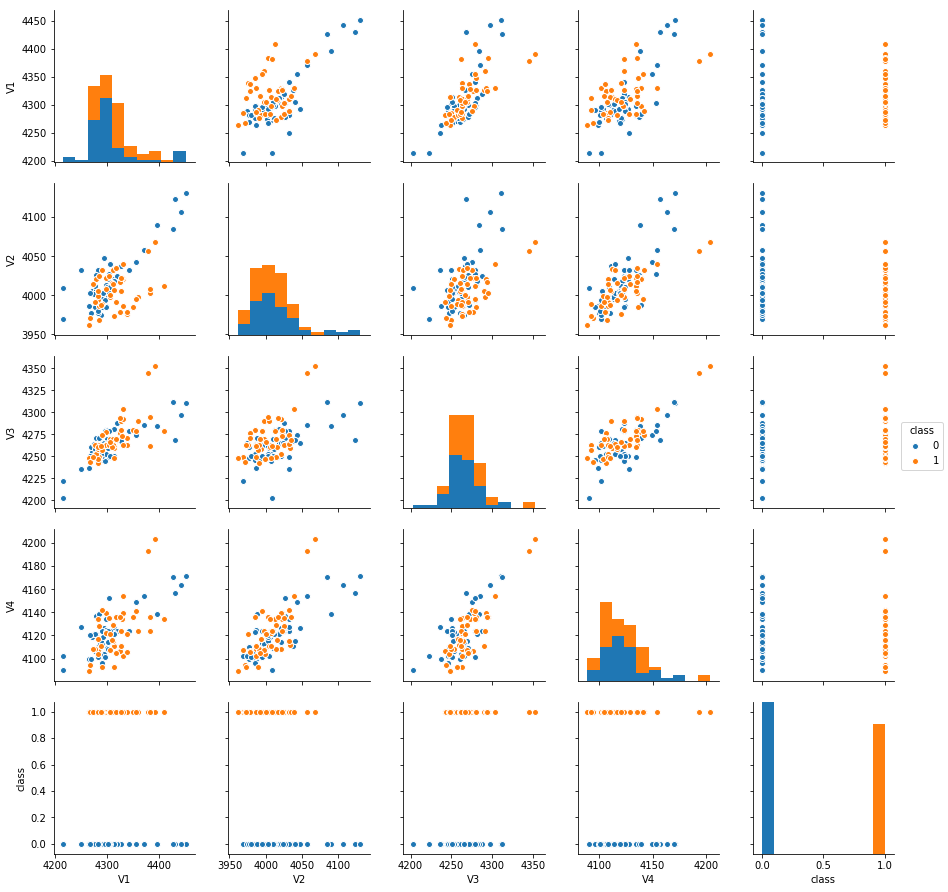

In [12]:
df_subset = df[['V1','V2','V3','V4','class']].sample(n=100)
sns.pairplot(df_subset,hue="class")

# Task

The function `openml.evaluation.list_evaluations(...)` returns a dictionary of evaluation records. It has several filtering functions, to keep the resulting set small (keep in mind that OpenML has almost 10 million runs, and more than a billion evaluation records). The function is documented in the [API docs](https://openml.github.io/openml-python/master/generated/openml.evaluations.list_evaluations.html#openml.evaluations.list_evaluations). It returns a dict mapping from `run_id` to [OpenMLEvaluation](https://openml.github.io/openml-python/master/generated/openml.OpenMLEvaluation.html#openml.OpenMLEvaluation). Examples of filters are `task`, `flow` and `function`. Note that one of these is mandatory.

* Obtain a subset of 100 predictive accuracy (`predictive_accuracy`) results on the letter dataset (task id = 6).
* Obtain a subset of 100 predictive accuracy (`predictive_accuracy`) results per task in the OpenML 100 and plot these 

In [13]:
suite = study.get_study('OpenML100')
scores = []
for task_id in suite.tasks[:2]: # [SPEED] only first 10 tasks
  results = evaluations.list_evaluations(function='predictive_accuracy', task=[task_id], size=100)
  # Download the tasks and plot the scores
  for evaluation in results.values():
    scores.append({"flow": evaluation.flow_name, "score": evaluation.value, "task": evaluation.data_name})
    
sns.violinplot(x="task", y="score", data=pd.DataFrame(scores), scale="width", palette="Set3");

KeyError: 'oml:tag'

# Dataset Upload

There are various ways to upload a dataset. The most convenient ways are documented in [this example](https://github.com/openml/openml-python/blob/master/examples/create_upload_tutorial.py). Most conveniently, this can be done using a [pandas dataframe](https://github.com/openml/openml-python/blob/a0ef724fec6ab31f6381d3ac2a84827ab535170d/examples/create_upload_tutorial.py#L206). Additionally, we need to create a [OpenMLDataset](https://openml.github.io/openml-python/master/generated/openml.OpenMLDataset.html#openml.OpenMLDataset) object, containing information about the dataset. Most notably, the arguments `name`, `default_target_attribute`, `attributes` and `data` need to be set.

* Find your favorite dataset (on your laptop), load it as pandas dataframe and upload it to OpenML.
* Common problem: Server returns error 131. This means that the description file was not complete. The [XSD](https://github.com/openml/OpenML/blob/master/openml_OS/views/pages/api_new/v1/xsd/openml.data.upload.xsd) for uploading the dataset hints what fields are mandatory.


* If you did not bring you own dataset, find an interesting public dataset on:
    * Kaggle open datasets: https://www.kaggle.com/datasets
    * Data.world: https://data.world/
    * Wolfram Alpha: https://datarepository.wolframcloud.com/
    * More: https://git.io/vdTXm
* Note that:
    * The dataset should not already be on OpenML.
    * Tabular (e.g. CSV) data, representing a classification or regression problem
    * No text/image data, unless already featurized

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

In [ ]:
description = "the Cleveland database on heart disease"
citation = None

In [ ]:
heart_dataset = datasets.functions.create_dataset(name="heartdisease cleveland",
                                                 description = description,
                                                 creator = "Hungarian Institute of Cardiology Andras Janosi, M.D",
                                                 contributor = None,
                                                 collection_date = None,
                                                 language = 'English',
                                                 default_target_attribute ='target',
                                                 row_id_attribute=None,
                                                 ignore_attribute=None,
                                                 citation=citation,
                                                 licence = None,
                                                 attributes= 'auto',
                                                 data=df,
                                                 version_label='example',
                                                 )


In [ ]:
#upload_did = heart_dataset.publish()
#print('URL for dataset: %s/data/%d' % (config.server, upload_did))